In [25]:
from dotenv import load_dotenv
load_dotenv("/Users/a2024/Desktop/Antar_CRM/.env")

True

In [26]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("llama-3.3-70b-versatile", model_provider="groq")

In [27]:
from langgraph.graph import START, StateGraph, END
from typing import List, TypedDict, Annotated


class State(TypedDict):
    question: str
    decision: str




In [28]:
from langchain.tools import tool

In [48]:
from typing import Optional
from typing_extensions import Annotated, TypedDict
from pydantic import BaseModel, Field, ValidationError
import os
from typing import Dict, List, Optional
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain.chat_models import init_chat_model
import requests
import json
import re


load_dotenv("/Users/a2024/Desktop/Antar_CRM/antarcrm/.env")

chat_llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.2,
    openai_api_key=os.getenv("OPENAI_API_KEY"),
)

In [ ]:
def create_lead(state: State):
    """This def is used to create a lead in a CRM system."""
    



    class LeadDetails(BaseModel):
        "Complete details of a lead in a CRM system."

        salutation: Optional[str] = Field(
            default="null",
            pattern="^(Mr|Mrs|Ms|Dr)$",
            description="Salutation of the lead.",
        )
        first_name: str = Field(
            ..., min_length=2, max_length=50, description="First name of the lead."
        )
        last_name: Optional[str] = Field(
            default="", min_length=0, max_length=50, description="Last name of the lead."
        )
        company: Optional[str] = Field(
            default="null", max_length=100, description="Company name of the lead."
        )
        email: Optional[str] = Field(
            default="null",
            pattern=r"^\S+@\S+\.\S+$",
            description="Email address of the lead.",
        )
        gender: Optional[str] = Field(default="null", pattern="^(Male|Female|Other)$")
        lead_source: Optional[str] = Field(
            default="null", description="Lead source of the lead."
        )
        lead_score: Optional[int] = Field(
            default=0, ge=0, le=100, description="Lead score of the lead."
        )
        lead_value: Optional[str] = Field(
            default="null", description="Lead value of the lead."
        )
        website: Optional[str] = Field(default="null", description="Website of the lead.")
        status: str = Field(
            default="new",
            pattern="^(new|contacted|qualified|lost)$",
            description="Status of the lead.",
        )
        converted: Optional[int] = Field(
            default=0, description="Converted status of the lead."
        )
        revenue: Optional[int] = Field(default=0, ge=0, description="Revenue of the lead.")
        company_constitution: Optional[str] = Field(
            default="null", description="Company constitution of the lead."
        )
        company_incorporation_date: Optional[str] = Field(
            default="null", description="Company incorporation date of the lead."
        )
        mobile_code: Optional[str] = Field(
            default="null", description="Mobile code of the lead."
        )
        mobile_no: Optional[str] = Field(
            default="null",
            min_length=10,
            max_length=15,
            description="Mobile number of the lead.",
        )
        employees: Optional[int] = Field(
            default=0, ge=0, description="Number of employees of the lead."
        )
        territory_id: Optional[str] = Field(
            default="null", description="Territory ID of the lead."
        )
        industry_id: Optional[str] = Field(
            default="null", description="Industry ID of the lead."
        )
        department_id: Optional[str] = Field(
            default="null", description="Department ID of the lead."
        )


    def ask_to_update(field: str, current_value: str) -> bool:
        """Ask the user if they want to update an existing field."""
        print(value, current_value)
        response = (
            input(
                f"Do you want to update '{field}' (current value: '{current_value}')? (y/n): "
            )
            .strip()
            .lower()
        )
        return response == "y"


    def validate_lead_score(lead_score: int) -> bool:
        """Validate that the lead_score is between 0 and 100."""
        return 0 <= lead_score <= 100


    def handle_validation_error(error: ValidationError) -> str:
        """Generate a user-friendly error message from a Pydantic ValidationError."""
        errors = []
        for err in error.errors():
            field = err["loc"][0]  # Get the field name
            msg = err["msg"]  # Get the error message
            # Translate error messages into natural language
            if msg == "Input should be a valid string":
                errors.append(
                    f"The value for '{field}' must be text, not a number or other type."
                )
            elif msg == "Input should be a valid integer":
                errors.append(f"The value for '{field}' must be a whole number.")
            elif msg.startswith("String should match pattern"):
                errors.append(f"The value for '{field}' is not in the correct format.")
            elif msg == "ensure this value is greater than or equal to 0":
                errors.append(f"The value for '{field}' must be 0 or greater.")
            elif msg == "ensure this value is less than or equal to 100":
                errors.append(f"The value for '{field}' must be 100 or less.")
            else:
                errors.append(f"Error in '{field}': {msg}")
        return "\n".join(errors)


    # def llm_parser():
    def api(data):

        url = "URI"

        token = "token"  # Replace with a valid token

        headers = {
            "Authorization": token,
            "Content-Type": "application/json",
            "device": "crkiosk",
        }
        # data = json.dumps(data)
        response = requests.post(url, json=data, headers=headers)

        print("Response Status Code:", response.status_code)
        print("Raw Response Text:", response.text)  # Check if response is empty
        print(
            "Response Headers:", response.headers
        )  # Check if API is returning something unexpected

        try:
            print("Response JSON:", response.json())  # Try parsing JSON
        except requests.exceptions.JSONDecodeError:
            print("Error: API returned an empty or non-JSON response")


    parser = JsonOutputParser(pydantic_object=LeadDetails)
    groq_api_key = os.getenv("GROQ_API_KEY")
    llm = init_chat_model(
        "mixtral-8x7b-32768",
        model_provider="groq",
        api_key="api",
    )
    prompt = ChatPromptTemplate(
        [
            (
                "system",
                """You Are a CRM system details: extraxter agent you need to collect the following details from the given user query.\n\n.

        



    so collect the above details from the user query and return it.

    You must respond with ONLY a valid JSON object in this exact format:
    EXAMPLE:

    \n\n

    User Query: create lead as ram
    output: {{"first_name": "ram"}} 

    \n\n

    ALREADY COLLECTED DATA:\n
        as of now The Collected data are: {collected_data}
        IF the data are available dont replace with any other values like "NONE" 
        IF its null or DEFAULT value then collect the data from it
        Your work is parse the datas from the user query only DO NOT Add any new data And DO NOT Hallucinate YourSelf.
    \n\n

    STRICTLY FOLLOW THE INSTRUCTIONS:
    parse the AVAIALABLE data from the USER QUERY Dont return with None values.
    Ensure underscores are NOT escaped.
    `"You must always return valid JSON fenced by a markdown code block. Do not return any additional text."`
    "DO NOT FORMAT like this: {{
    "lead\\_score": 90
    }}"\n\n

    Answer the user query. Wrap the output in `json` tags {format_instructions}\n
    \n""",
            ),
            ("user", "this is the user input:{query}"),
        ]
    ).partial(format_instructions=parser.get_format_instructions())
    # .partial(format_instructions=parser.get_format_instructions())
    # {format_instructions}

    chain = prompt | llm | parser
    # query = "create a lead jhon doe from antar crm with antar@gmail.com and the lead source is hentai the lead score is 7"
    # result = chain.invoke({"query": query})
    # return result
    print("How can I help you?")
    colleceted_data: dict = {}
    while True:
        query = input().strip()
        if query.lower() in ["exit", "quit"]:
            print("Goodbye!")
            break
        if query.lower() in ["help"]:
            print("You can ask me to create a lead in the CRM system.")
            continue
        if query.lower() in ["show"]:
            try:
                # print(llm.invoke(json.dumps(LeadDetails(**colleceted_data).model_dump())))
                print(json.dumps(LeadDetails(**colleceted_data).model_dump()))
                continue
            except Exception as e:
                print(f"Error: {e}")
        if query.lower() in ["clear"]:
            colleceted_data = {}
            print("Data cleared.")
            continue
        if query.lower() in ["submit"]:
            try:
                print("Check the data before submitting:")
                print(json.dumps(LeadDetails(**colleceted_data).model_dump()))
                # api(data=LeadDetails(**colleceted_data).model_dump())
                if input("Do you want to submit this data? (y/n): ").lower() == "y":
                    api(data=LeadDetails(**colleceted_data).model_dump())
                    print("Data submitted.")
                    break
                else:
                    continue
            except Exception as e:
                print(f"Error: {e}")
        else:
            try:
                initiate_query = chain.invoke(
                    {"query": query, "collected_data": colleceted_data}
                )
                if initiate_query == colleceted_data:
                    print(
                        "No new information was parsed from your input. Please provide more details."
                    )
                # for field, value in initiate_query.items():
                #     if field == "lead_score":
                #         if not validate_lead_score(value):
                #             print(
                #                 f"Warning: 'lead_score' must be between 0 and 100. Provided value: {value} was ignored."
                #             )
                #             continue  # Skip updating if validation fails

                try:
                    # Validate the cleaned_data against the Pydantic model
                    LeadDetails(**{**colleceted_data, **initiate_query})
                    # print(LeadDetails(**{**colleceted_data, **initiate_query}))
                    # colleceted_data.update(initiate_query)
                    # If validation passes, update the collected_data
                    for field, value in initiate_query.items():
                        if field == "lead_score":
                            if not validate_lead_score(value):
                                print(
                                    f"Warning: 'lead_score' must be between 0 and 100. Provided value: {value} was ignored."
                                )
                                continue  # Skip updating lead_score if it's invalid
                        if field in colleceted_data:
                            if initiate_query[field] != colleceted_data[field]:
                                if not ask_to_update(field, colleceted_data[field]):
                                    continue  # Skip updating this field
                        if field in colleceted_data:
                            print(f"Updated '{field}' to '{value}'.")
                        else:
                            print(f"Added '{field}' with value '{value}'.")
                        colleceted_data[field] = value

                    print("Done")
                except ValidationError as e:
                    print(f"Error: {handle_validation_error(e)}")

                # for field, value in initiate_query.items():
                #     if field == "lead_score":
                #         if not validate_lead_score(value):
                #             print(
                #                 f"Warning: 'lead_score' must be between 0 and 100. Provided value: {value} was ignored."
                #             )
                #             continue
                #     if field in colleceted_data:
                #         if initiate_query[field] != colleceted_data[field]:
                #             if not ask_to_update(field, colleceted_data[field]):
                #                 continue
                # colleceted_data.update(initiate_query)
            except Exception as e:
                print(f"Error: {e}")


''

In [ ]:

.content

''

In [ ]:
graph = StateGraph(State)
graph.add_node(

In [2]:
from langgraph.graph import START, StateGraph, END
from typing import List, TypedDict, Annotated
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
# from Notes.create_notes import NoteManager

load_dotenv()


class Decision(TypedDict):
    operation: str
    schema_name: str  # Renamed from 'schema' to avoid conflict


class State(TypedDict):
    question: str
    operation: str
    schema_name: str


llm = ChatOpenAI(
    model="gpt-4o-mini",  # llm
    temperature=0.2,
    openai_api_key=os.getenv("OPENAI_API_KEY"),
)


# Create
def create_note(state: State):
    print("Creating a new note")
    try:
        manager = NoteManager()
        manager.run_interactive_session(state)
    except Exception as e:
        print(f"Application error: {e}")


def create_lead(state: State):
    print("Creating a new lead")
    pass


def create_contact(state: State):
    print("Creating a new contact")
    pass


def create_organization(state: State):
    print("Creating a new organization")
    pass


def create_opportunity(state: State):
    print("Creating a new opportunity")
    pass


def create_task(state: State):
    print("Creating a new task")
    pass


# Read
def read_lead(state: State):
    print("Reading a lead")
    pass


def read_note(state: State):
    print("Reading a note")
    pass


def read_contact(state: State):
    print("Reading a contact")
    pass


def read_organization(state: State):
    print("Reading a organization")
    pass


def read_opportunity(state: State):
    print("Reading a opportunity")
    pass


def read_task(state: State):
    print("Reading a task")
    pass


# Update
def update_lead(state: State):
    print("Updating a lead")
    pass


def update_note(state: State):
    print("Updating a note")
    pass


def update_contact(state: State):
    print("Updating a contact")
    pass


def update_organization(state: State):
    print("Updating a organization")
    pass


def update_opportunity(state: State):
    print("Updating a opportunity")
    pass


def update_task(state: State):
    print("Updating a task")
    pass


# Delete
def delete_lead(state: State):
    print("Deleting a lead")
    pass


def delete_note(state: State):
    print("Deleting a note")
    pass


def delete_contact(state: State):
    print("Deleting a contact")
    pass


def delete_organization(state: State):
    print("Deleting a organization")
    pass


def delete_opportunity(state: State):
    print("Deleting a opportunity")
    pass


def delete_task(state: State):
    print("Deleting a task")
    pass


def unknown(state: State):
    print("Unknown operation")
    pass


def conditional_edge(state: State):

    # Routing the user query to the respective operation

    # Create
    if state["operation"] == "create":
        if state["schema_name"] == "lead":
            return "create_lead"
        elif state["schema_name"] == "note":
            return "create_note"
        elif state["schema_name"] == "contact":
            return "create_contact"
        elif state["schema_name"] == "organization":
            return "create_organization"
        elif state["schema_name"] == "opportunity":
            return "create_opportunity"
        elif state["schema_name"] == "task":
            return "create_task"
    # Read
    elif state["operation"] == "read":
        if state["schema_name"] == "lead":
            return "read_lead"
        elif state["schema_name"] == "note":
            return "read_note"
        elif state["schema_name"] == "contact":
            return "read_contact"
        elif state["schema_name"] == "organization":
            return "read_organization"
        elif state["schema_name"] == "opportunity":
            return "read_opportunity"
        elif state["schema_name"] == "task":
            return "read_task"
    # Update
    elif state["operation"] == "update":
        if state["schema_name"] == "lead":
            return "update_lead"
        elif state["schema_name"] == "note":
            return "update_note"
        elif state["schema_name"] == "contact":
            return "update_contact"
        elif state["schema_name"] == "organization":
            return "update_organization"
        elif state["schema_name"] == "opportunity":
            return "update_opportunity"
        elif state["schema_name"] == "task":
            return "update_task"
    # Delete
    elif state["operation"] == "delete":
        if state["schema_name"] == "lead":
            return "delete_lead"
        elif state["schema_name"] == "note":
            return "delete_note"
        elif state["schema_name"] == "contact":
            return "delete_contact"
        elif state["schema_name"] == "organization":
            return "delete_organization"
        elif state["schema_name"] == "opportunity":
            return "delete_opportunity"
        elif state["schema_name"] == "task":
            return "delete_task"
    else:
        return "unknown"


def decide_intent(state: State):
    "Decide the operation to be performed based on the user query."

    system_message = """You are a CRM System Manager for Antar CRM.
    Here There are several operations CREATE, READ, UPDATE and DELETE.
    With Several Schema like Lead, Contact, Organization, Opportunity, Task, Note.
    User input will pass through the system and you need to decide which operation to perform.
    if in the user query any one of the information not available then return 'unknown'.
        e.g. what is salary then it should return 'unknown'.
    
    FOR EXAMPLE:
    If the user query is "Create a new lead", then you need to decide the operation as 'create' and schema as 'lead'.
    
    YOUR TASK:
        1. Extract the OPERATION NAME from the user query, and schema name.
        2. Return the operation name and the schema name.
        if related to create then it return with 'create' and so on and schema name as 'lead'.
        if the task is not related to any of the above operations then return 'unknown'.
    """

    prompt = ChatPromptTemplate(
        [("system", system_message), ("user", "this is the user input:{query}")]
    )
    chain = prompt | llm.with_structured_output(Decision)
    response = chain.invoke({"query": state["question"]})

    print(
        "__________________________________ USER QUERY __________________________________"
    )
    print(state["question"])
    print(
        "__________________________________ SYSTEM RESPONSE __________________________________"
    )
    state["operation"] = response["operation"]
    state["schema_name"] = response["schema_name"]
    print(state)
    return state


def build_graph():
    graph = StateGraph(State)
    graph.add_node("decide_intent", decide_intent)
    graph.add_node("create_lead", create_lead)
    graph.add_node("create_note", create_note)
    graph.add_node("create_contact", create_contact)
    graph.add_node("create_organization", create_organization)
    graph.add_node("create_opportunity", create_opportunity)
    graph.add_node("create_task", create_task)
    graph.add_node("read_lead", read_lead)
    graph.add_node("read_note", read_note)
    graph.add_node("read_contact", read_contact)
    graph.add_node("read_organization", read_organization)
    graph.add_node("read_opportunity", read_opportunity)
    graph.add_node("read_task", read_task)
    graph.add_node("update_lead", update_lead)
    graph.add_node("update_note", update_note)
    graph.add_node("update_contact", update_contact)
    graph.add_node("update_organization", update_organization)
    graph.add_node("update_opportunity", update_opportunity)
    graph.add_node("update_task", update_task)
    graph.add_node("delete_lead", delete_lead)
    graph.add_node("delete_note", delete_note)
    graph.add_node("delete_contact", delete_contact)
    graph.add_node("delete_organization", delete_organization)
    graph.add_node("delete_opportunity", delete_opportunity)
    graph.add_node("delete_task", delete_task)
    graph.add_node("unknown", unknown)

    graph.set_entry_point("decide_intent")

    graph.add_conditional_edges(
        "decide_intent",
        conditional_edge,
        {
            "create_note": "create_note",
            "create_lead": "create_lead",
            "create_contact": "create_contact",
            "create_organization": "create_organization",
            "create_opportunity": "create_opportunity",
            "create_task": "create_task",
            "read_lead": "read_lead",
            "read_note": "read_note",
            "read_contact": "read_contact",
            "read_organization": "read_organization",
            "read_opportunity": "read_opportunity",
            "read_task": "read_task",
            "update_lead": "update_lead",
            "update_note": "update_note",
            "update_contact": "update_contact",
            "update_organization": "update_organization",
            "update_opportunity": "update_opportunity",
            "update_task": "update_task",
            "delete_lead": "delete_lead",
            "delete_note": "delete_note",
            "delete_contact": "delete_contact",
            "delete_organization": "delete_organization",
            "delete_opportunity": "delete_opportunity",
            "delete_task": "delete_task",
            "unknown": "unknown",
        },
    )
    graph.add_edge("create_note", END)
    graph.add_edge("create_lead", END)
    graph.add_edge("create_contact", END)
    graph.add_edge("create_organization", END)
    graph.add_edge("create_opportunity", END)
    graph.add_edge("create_task", END)
    graph.add_edge("read_lead", END)
    graph.add_edge("read_note", END)
    graph.add_edge("read_contact", END)
    graph.add_edge("read_organization", END)
    graph.add_edge("read_opportunity", END)
    graph.add_edge("read_task", END)
    graph.add_edge("update_lead", END)
    graph.add_edge("update_note", END)
    graph.add_edge("update_contact", END)
    graph.add_edge("update_organization", END)
    graph.add_edge("update_opportunity", END)
    graph.add_edge("update_task", END)
    graph.add_edge("delete_lead", END)
    graph.add_edge("delete_note", END)
    graph.add_edge("delete_contact", END)
    graph.add_edge("delete_organization", END)
    graph.add_edge("delete_opportunity", END)
    graph.add_edge("delete_task", END)
    graph.add_edge("unknown", END)
    final_graph = graph.compile()
    return final_graph


if __name__ == "__main__":
    # Create an instance of the State dictionary
    question = input("> ").strip()
    state = {"question": question}

    graph = build_graph()

In [2]:
from langgraph.graph import START, StateGraph, END
from typing import List, TypedDict, Annotated
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
# from Notes.create_notes import NoteManager

load_dotenv()


class Decision(TypedDict):
    operation: str
    schema_name: str  # Renamed from 'schema' to avoid conflict


class State(TypedDict):
    question: str
    operation: str
    schema_name: str
    next_node: str


llm = ChatOpenAI(
    model="gpt-4o-mini",  # llm
    temperature=0.2,
    openai_api_key=os.getenv("OPENAI_API_KEY"),
)


# Create
def create_note(state: State):
    print("Creating a new note")
    # try:
    #     manager = NoteManager()
    #     manager.run_interactive_session(state)
    # except Exception as e:
    #     print(f"Application error: {e}")


def create_lead(state: State):
    print("Creating a new lead")
    pass


def create_contact(state: State):
    print("Creating a new contact")
    pass


def create_organization(state: State):
    print("Creating a new organization")
    pass


def create_opportunity(state: State):
    print("Creating a new opportunity")
    pass


def create_task(state: State):
    print("Creating a new task")
    pass


def create_conditional(state: State):
    if state["schema_name"] == "lead":
        return {"next_node": "create_lead"}
    elif state["schema_name"] == "note":
        return {"next_node": "create_note"}
    elif state["schema_name"] == "contact":
        return {"next_node": "create_contact"}
    elif state["schema_name"] == "organization":
        return {"next_node": "create_organization"}
    elif state["schema_name"] == "opportunity":
        return {"next_node": "create_opportunity"}
    elif state["schema_name"] == "task":
        return {"next_node": "create_task"}
    else:
        return {"next_node": "unknown"}


# Read
def read_lead(state: State):
    print("Reading a lead")
    pass


def read_note(state: State):
    print("Reading a note")
    pass


def read_contact(state: State):
    print("Reading a contact")
    pass


def read_organization(state: State):
    print("Reading a organization")
    pass


def read_opportunity(state: State):
    print("Reading a opportunity")
    pass


def read_task(state: State):
    print("Reading a task")
    pass


def read_conditional(state: State):
    if state["schema_name"] == "lead":
        return {"next_node": "read_lead"}
    elif state["schema_name"] == "note":
        return {"next_node": "read_note"}
    elif state["schema_name"] == "contact":
        return {"next_node": "read_contact"}
    elif state["schema_name"] == "organization":
        return {"next_node": "read_organization"}
    elif state["schema_name"] == "opportunity":
        return {"next_node": "read_opportunity"}
    elif state["schema_name"] == "task":
        return {"next_node": "read_task"}
    else:
        return {"next_node": "unknown"}


# Update
def update_lead(state: State):
    print("Updating a lead")
    pass


def update_note(state: State):
    print("Updating a note")
    pass


def update_contact(state: State):
    print("Updating a contact")
    pass


def update_organization(state: State):
    print("Updating a organization")
    pass


def update_opportunity(state: State):
    print("Updating a opportunity")
    pass


def update_task(state: State):
    print("Updating a task")
    pass


def update_conditional(state: State):
    if state["schema_name"] == "lead":
        return {"next_node": "update_lead"}
    elif state["schema_name"] == "note":
        return {"next_node": "update_note"}
    elif state["schema_name"] == "contact":
        return {"next_node": "update_contact"}
    elif state["schema_name"] == "organization":
        return {"next_node": "update_organization"}
    elif state["schema_name"] == "opportunity":
        return {"next_node": "update_opportunity"}
    elif state["schema_name"] == "task":
        return {"next_node": "update_task"}
    else:
        return {"next_node": "unknown"}


# Delete
def delete_lead(state: State):
    print("Deleting a lead")
    pass


def delete_note(state: State):
    print("Deleting a note")
    pass


def delete_contact(state: State):
    print("Deleting a contact")
    pass


def delete_organization(state: State):
    print("Deleting a organization")
    pass


def delete_opportunity(state: State):
    print("Deleting a opportunity")
    pass


def delete_task(state: State):
    print("Deleting a task")
    pass


def delete_conditional(state: State):
    if state["schema_name"] == "lead":
        return {"next_node": "delete_lead"}
    elif state["schema_name"] == "note":
        return {"next_node": "delete_note"}
    elif state["schema_name"] == "contact":
        return {"next_node": "delete_contact"}
    elif state["schema_name"] == "organization":
        return {"next_node": "delete_organization"}
    elif state["schema_name"] == "opportunity":
        return {"next_node": "delete_opportunity"}
    elif state["schema_name"] == "task":
        return {"next_node": "delete_task"}
    else:
        return {"next_node": "unknown"}


def unknown(state: State):
    print("Unknown operation")
    pass


def decide_intent(state: State):
    """Decide the operation to be performed based on the user query."""
    system_message = """You are a CRM System Manager for Antar CRM.
    Here There are several operations CREATE, READ, UPDATE and DELETE.
    With Several Schema like Lead, Contact, Organization, Opportunity, Task, Note.
    User input will pass through the system and you need to decide which operation to perform.
    if in the user query any one of the information not available then return 'unknown'.
        e.g. what is salary then it should return 'unknown'.
    
    FOR EXAMPLE:
    If the user query is "Create a new lead", then you need to decide the operation as 'create' and schema as 'lead'.
    
    YOUR TASK:
        1. Extract the OPERATION NAME from the user query, and schema name.
        2. Return the operation name and the schema name.
        if related to create then it return with 'create' and so on and schema name as 'lead'.
        if the task is not related to any of the above operations then return 'unknown'.
    """

    prompt = ChatPromptTemplate(
        [("system", system_message), ("user", "this is the user input:{query}")]
    )
    chain = prompt | llm.with_structured_output(Decision)
    response = chain.invoke({"query": state["question"]})

    print(
        "__________________________________ USER QUERY __________________________________"
    )
    print(state["question"])
    print(
        "__________________________________ SYSTEM RESPONSE __________________________________"
    )
    state["operation"] = response["operation"]
    state["schema_name"] = response["schema_name"]

    # Add the next_node key based on the operation
    if state["operation"] == "create":
        state["next_node"] = "create_conditional"
    elif state["operation"] == "read":
        state["next_node"] = "read_conditional"
    elif state["operation"] == "update":
        state["next_node"] = "update_conditional"
    elif state["operation"] == "delete":
        state["next_node"] = "delete_conditional"
    else:
        state["next_node"] = "unknown"

    print(state)
    return state


def build_graph():
    graph = StateGraph(State)
    graph.add_node("decide_intent", decide_intent)
    graph.add_node("create_lead", create_lead)
    graph.add_node("create_note", create_note)
    graph.add_node("create_contact", create_contact)
    graph.add_node("create_organization", create_organization)
    graph.add_node("create_opportunity", create_opportunity)
    graph.add_node("create_task", create_task)

    graph.add_node("create_conditional", create_conditional)

    graph.add_node("read_lead", read_lead)
    graph.add_node("read_note", read_note)
    graph.add_node("read_contact", read_contact)
    graph.add_node("read_organization", read_organization)
    graph.add_node("read_opportunity", read_opportunity)
    graph.add_node("read_task", read_task)

    graph.add_node("read_conditional", read_conditional)

    graph.add_node("update_lead", update_lead)
    graph.add_node("update_note", update_note)
    graph.add_node("update_contact", update_contact)
    graph.add_node("update_organization", update_organization)
    graph.add_node("update_opportunity", update_opportunity)
    graph.add_node("update_task", update_task)

    graph.add_node("update_conditional", update_conditional)

    graph.add_node("delete_lead", delete_lead)
    graph.add_node("delete_note", delete_note)
    graph.add_node("delete_contact", delete_contact)
    graph.add_node("delete_organization", delete_organization)
    graph.add_node("delete_opportunity", delete_opportunity)
    graph.add_node("delete_task", delete_task)

    graph.add_node("delete_conditional", delete_conditional)

    graph.add_node("unknown", unknown)

    graph.set_entry_point("decide_intent")

    graph.add_conditional_edges(
        "decide_intent",
        lambda state: state["next_node"],
        {
            "create_conditional": "create_conditional",
            "read_conditional": "read_conditional",
            "update_conditional": "update_conditional",
            "delete_conditional": "delete_conditional",
            "unknown": "unknown",
        },
    )

    graph.add_conditional_edges(
        "create_conditional",
        lambda state: state["next_node"],
        {
            "create_lead": "create_lead",
            "create_note": "create_note",
            "create_contact": "create_contact",
            "create_organization": "create_organization",
            "create_opportunity": "create_opportunity",
            "create_task": "create_task",
            "unknown": "unknown",
        },
    )

    graph.add_conditional_edges(
        "read_conditional",
        lambda state: state["next_node"],
        {
            "read_lead": "read_lead",
            "read_note": "read_note",
            "read_contact": "read_contact",
            "read_organization": "read_organization",
            "read_opportunity": "read_opportunity",
            "read_task": "read_task",
            "unknown": "unknown",
        },
    )

    graph.add_conditional_edges(
        "update_conditional",
        lambda state: state["next_node"],
        {
            "update_lead": "update_lead",
            "update_note": "update_note",
            "update_contact": "update_contact",
            "update_organization": "update_organization",
            "update_opportunity": "update_opportunity",
            "update_task": "update_task",
            "unknown": "unknown",
        },
    )

    graph.add_conditional_edges(
        "delete_conditional",
        lambda state: state["next_node"],
        {
            "delete_lead": "delete_lead",
            "delete_note": "delete_note",
            "delete_contact": "delete_contact",
            "delete_organization": "delete_organization",
            "delete_opportunity": "delete_opportunity",
            "delete_task": "delete_task",
            "unknown": "unknown",
        },
    )

    graph.add_edge("create_note", END)
    graph.add_edge("create_lead", END)
    graph.add_edge("create_contact", END)
    graph.add_edge("create_organization", END)
    graph.add_edge("create_opportunity", END)
    graph.add_edge("create_task", END)
    graph.add_edge("read_lead", END)
    graph.add_edge("read_note", END)
    graph.add_edge("read_contact", END)
    graph.add_edge("read_organization", END)
    graph.add_edge("read_opportunity", END)
    graph.add_edge("read_task", END)
    graph.add_edge("update_lead", END)
    graph.add_edge("update_note", END)
    graph.add_edge("update_contact", END)
    graph.add_edge("update_organization", END)
    graph.add_edge("update_opportunity", END)
    graph.add_edge("update_task", END)
    graph.add_edge("delete_lead", END)
    graph.add_edge("delete_note", END)
    graph.add_edge("delete_contact", END)
    graph.add_edge("delete_organization", END)
    graph.add_edge("delete_opportunity", END)
    graph.add_edge("delete_task", END)
    graph.add_edge("unknown", END)

    final_graph = graph.compile()
    return final_graph


if __name__ == "__main__":
    # Create an instance of the State dictionary
    question = input("> ").strip()
    state = {"question": question}

    graph = build_graph()
    # while True:
    #     if question.lower() == "exit":
    #         break
    #     graph.invoke(state)
    #     question = input("> ").strip()
    #     state = {"question": question}


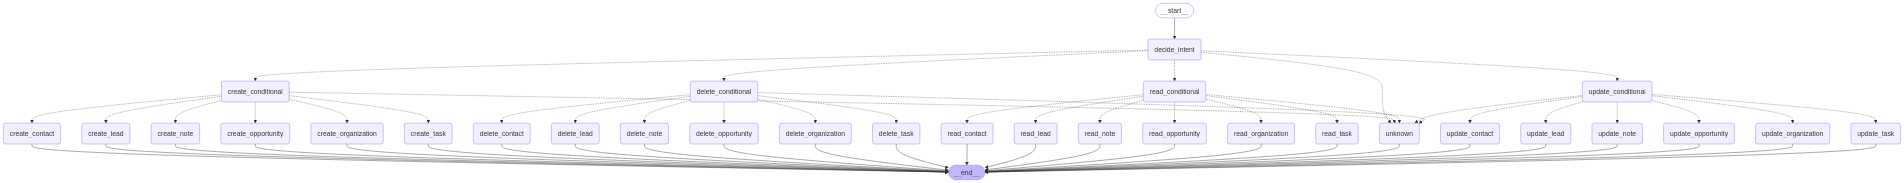

In [3]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)